<a href="https://colab.research.google.com/github/ysabellelam/CaliforniaHousingPricePredictor/blob/master/BobaInBayAreaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boba In Bay Area

For this notebook, I will be using the boba in the bay area dataset from the [Kaggle](https://www.kaggle.com/vnxiclaire/bobabayarea). 


---

## Part 1: Understanding the Dataset


In [ ]:
# Load dataset
# Remember to change the file location if needed

from google.colab import files
uploaded = files.upload()

import csv
f = open("./bayarea_boba_spots.csv")
all_lines = csv.reader(f, delimiter = ',')


Saving bayarea_boba_spots.csv to bayarea_boba_spots.csv


In [ ]:
dataset = []
header = ['id', 'idName', 'Name', 'Rating', 'Adress', 'Neighborhood', 'Lat', 
          'Long']
for line in all_lines:
    d = dict(zip(header, line))
    d['id'] = int(d['id'])
    d['Rating'] = float(d['Rating'])
    d['Lat'] = float(d['Lat'])
    d['Long'] = float(d['Long'])
    dataset.append(d)

In [ ]:
# See first line of dataset
dataset[0]

{'Adress': '46809 Warm Springs Blvd',
 'Lat': 37.48906669,
 'Long': -121.9294138,
 'Name': 'One Tea',
 'Neighborhood': 'Fremont',
 'Rating': 4.5,
 'id': 1,
 'idName': 'one-tea-fremont-2'}

---

## Part 2: Simple Statistics



In [ ]:
import numpy as np

In [ ]:
# Q: What is the total number of entries in the dataset?
len(dataset)


602

In [ ]:
# Q: What is the average rating?
rating = [d['Rating'] for d in dataset]
avg_rating = np.mean(rating)
print(avg_rating)

3.771594684385382


In [ ]:
# Q: What is the lowest and highest rating in the dataset?
highrate = np.max(rating)
lowrate = np.min(rating)

print("The max rating is", highrate)
print("The lowest rating is", lowrate)

The max rating is 5.0
The lowest rating is 2.0


In [ ]:
# Q: Average Ratings of Specific Neighborhoods

paloAlto = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'Palo Alto'])
fremont = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'Fremont'])
sanFrancisco = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'San Francisco'])
sanJose = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'San Jose'])
oakland = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'Oakland'])
berkeley = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'Berkeley'])
mntnView = np.mean([d['Rating'] for d in dataset if d['Neighborhood'] == 'Mountain View'])

# Change variable name if necessary
print('Palo Alto Average, Fremont, San Francisco, San Jose, Oakland, Berkely, Mountain View Respective Ratings:', paloAlto, fremont, sanFrancisco, sanJose, oakland, berkeley, mntnView)

Palo Alto Average, Fremont, San Francisco, San Jose, Oakland, Berkely, Mountain View Respective Ratings: 3.8157894736842106 3.757575757575758 3.9591836734693877 3.918181818181818 3.85 3.85 3.6153846153846154


---

## Part 3: Data Visualizations



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy
from collections import defaultdict

### Line Plots


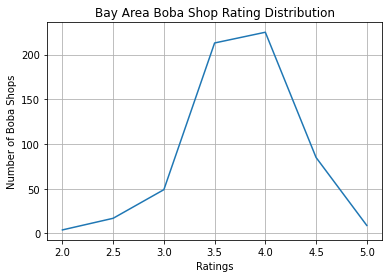

In [ ]:
ratings = [d['Rating'] for d in dataset]
ratings.sort()

boba_ratings = defaultdict(int)
for r in ratings:
    boba_ratings[r] += 1
X = list(boba_ratings.keys())
Y = list(boba_ratings.values())

# Customize plot
plt.gca().set(xlabel='Ratings', ylabel='Number of Boba Shops',
       title='Bay Area Boba Shop Rating Distribution')
plt.grid()

# Show the plot
plt.plot(X, Y)

### Histograms

[2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]


[Text(0, 0.5, 'Rating Frequency'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'Bay Area Boba Shop Rating Distribution')]

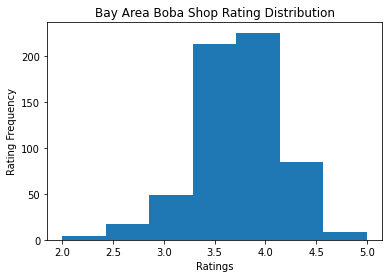

In [ ]:
# Flatten distribution list into frequency distribution
rating_freq = []
for key in boba_ratings.keys():
    for i in range(0, boba_ratings.get(key)):
        rating_freq.append(key)
print(rating_freq[:10])

plt.hist(rating_freq, bins=7)  # `density=False` would make counts
plt.gca().set(xlabel='Ratings', ylabel='Rating Frequency',
       title='Bay Area Boba Shop Rating Distribution')

### Scatter Plots

Scatter plots show the strength of a relationship between two variables (also known as correlations). From *Part 2: Simple Statistics*, we see that larger abalones tend to be larger, at least from a numbers perspective. **Let's see if this is actually true by creating a scatter plot showing the relationship between `Rings` and `Length`.** 

*On Your Own:* Read up on `sciPy` and how you can calculate and graph the correlation as well.

[Text(0, 0.5, 'Rating'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'Latitude of Boba Shop vs Rating')]

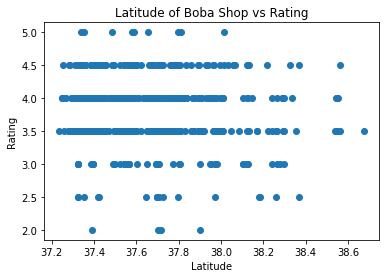

In [ ]:
ratings = [d['Rating'] for d in dataset]
lat = [d['Lat'] for d in dataset]
plt.scatter(lat, ratings)
plt.gca().set(ylabel='Rating', xlabel='Latitude',
       title='Latitude of Boba Shop vs Rating')

[Text(0, 0.5, 'Rating'),
 Text(0.5, 0, 'Longitude'),
 Text(0.5, 1.0, 'Longitude of Boba Shop vs Rating')]

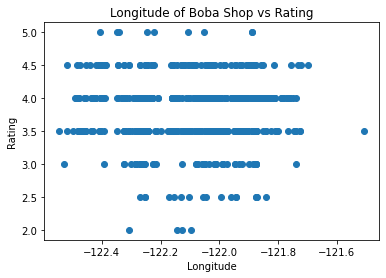

In [ ]:
# Complete this cell with a scatter plot of age vs length
ratings = [d['Rating'] for d in dataset]
long = [d['Long'] for d in dataset]
plt.scatter(long, ratings)
plt.gca().set(ylabel='Rating', xlabel='Longitude',
       title='Longitude of Boba Shop vs Rating')

### Bar Plots

Bar plots are great for comparing categorical variables. There are a few subtypes of bar plots, such as the grouped bar chart or stacked bar chart. Since we have the `Sex` field to play with, we can compare data across `M` and `F` abalones. Below is a simple stacked bar chart comparing the `Sex` category with the `Shucked Weight` data. **Create a bar chart of your choice of data.** 

You may refer to the cell below to parse out fields by sex.

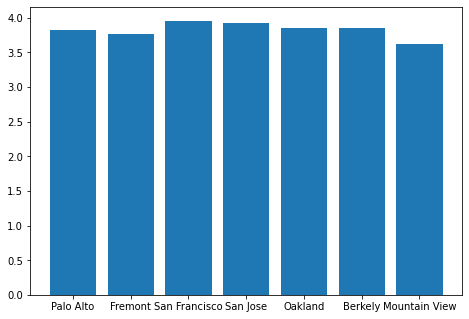

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
neigh = ['Palo Alto', 'Fremont', 'San Francisco', 'San Jose', 'Oakland', 'Berkely', 'Mountain View']
avgRatings = [paloAlto, fremont, sanFrancisco, sanJose, oakland, berkeley, mntnView]
ax.bar(neigh,avgRatings)
plt.show()

### Box Plots

Text(0.5, 1.0, 'Rating Freq')

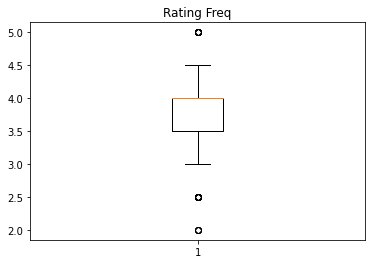

In [ ]:
# Complete this cell with multiple box plots
fig, (ax1) = plt.subplots(1, 1)

ax1.boxplot(rating_freq)
ax1.set_title('Rating Freq')
